# Employee retention prediction Model

In [1]:
# importing the relevant libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LogisticRegression

In [2]:
# getting the data
raw_data = pd.read_csv('HR_attrtion_data.csv')

In [3]:
# checking the shape
raw_data.shape

(14999, 11)

In [4]:
# glance of data
raw_data.head()

,Unnamed: 0,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,Department,salary
0,0,0.38,0.53,2,157,3,0,1,0,sales,low
1,1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,3,0.72,0.87,5,223,5,0,1,0,sales,low
4,4,0.37,0.52,2,159,3,0,1,0,sales,low


In [5]:
# checking the bottom 5 entries
raw_data.tail()

,Unnamed: 0,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,Department,salary
14994,14994,0.40,0.57,2,151,3,0,1,0,support,low
14995,14995,0.37,0.48,2,160,3,0,1,0,support,low
14996,14996,0.37,0.53,2,143,3,0,1,0,support,low
14997,14997,0.11,0.96,6,280,4,0,1,0,support,low
14998,14998,0.37,0.52,2,158,3,0,1,0,support,low


In [6]:
# making a copy of raw_data and use it further
df = raw_data.copy()

In [7]:
# getiing the total information 
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14999 entries, 0 to 14998
Data columns (total 11 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Unnamed: 0             14999 non-null  int64  
 1   satisfaction_level     14999 non-null  float64
 2   last_evaluation        14999 non-null  float64
 3   number_project         14999 non-null  int64  
 4   average_montly_hours   14999 non-null  int64  
 5   time_spend_company     14999 non-null  int64  
 6   Work_accident          14999 non-null  int64  
 7   left                   14999 non-null  int64  
 8   promotion_last_5years  14999 non-null  int64  
 9   Department             14999 non-null  object 
 10  salary                 14999 non-null  object 
dtypes: float64(2), int64(7), object(2)
memory usage: 1.3+ MB


In [8]:
df

,Unnamed: 0,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,Department,salary
0,0,0.38,0.53,2,157,3,0,1,0,sales,low
1,1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,3,0.72,0.87,5,223,5,0,1,0,sales,low
4,4,0.37,0.52,2,159,3,0,1,0,sales,low
...,...,...,...,...,...,...,...,...,...,...,...
14994,14994,0.40,0.57,2,151,3,0,1,0,support,low
14995,14995,0.37,0.48,2,160,3,0,1,0,support,low
14996,14996,0.37,0.53,2,143,3,0,1,0,support,low
14997,14997,0.11,0.96,6,280,4,0,1,0,support,low


In [9]:
df['time_spend_company'].unique()

array([ 3,  6,  4,  5,  2,  8, 10,  7], dtype=int64)

In [10]:
df.salary.unique()

array(['low', 'medium', 'high'], dtype=object)

<AxesSubplot:xlabel='salary', ylabel='count'>

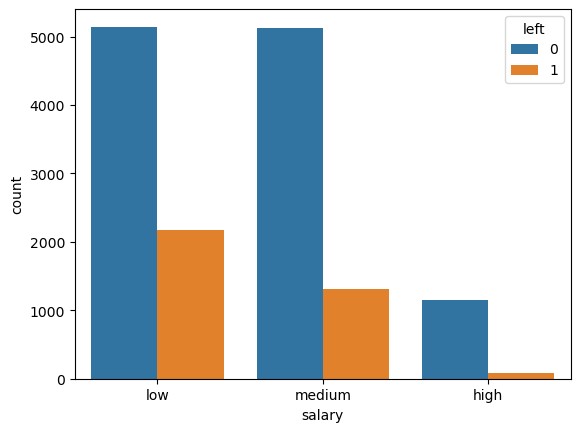

In [11]:
# Lets see the impact of salary on retention
sns.countplot(x = 'salary',hue = 'left',data=df)

We can see that highsalaried people have very low chances to leave the organisation and low salaried people are haveing higher attrition rate.

In [12]:
df.groupby('left').mean()

,Unnamed: 0,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,promotion_last_5years
left,,,,,,,,
0,7811.340742,0.666810,0.715473,3.786664,199.060203,3.380032,0.175009,0.026251
1,6499.439653,0.440098,0.718113,3.855503,207.419210,3.876505,0.047326,0.005321


from above we can see that retained epmployess (not left 0) have higher satisafaction level as compared to left employees. Last evaluation,number project,time spend_company and work accident these column values are not changing much for epmloyees who are left and who are retained.
So these column/features may be ignored during analysis.

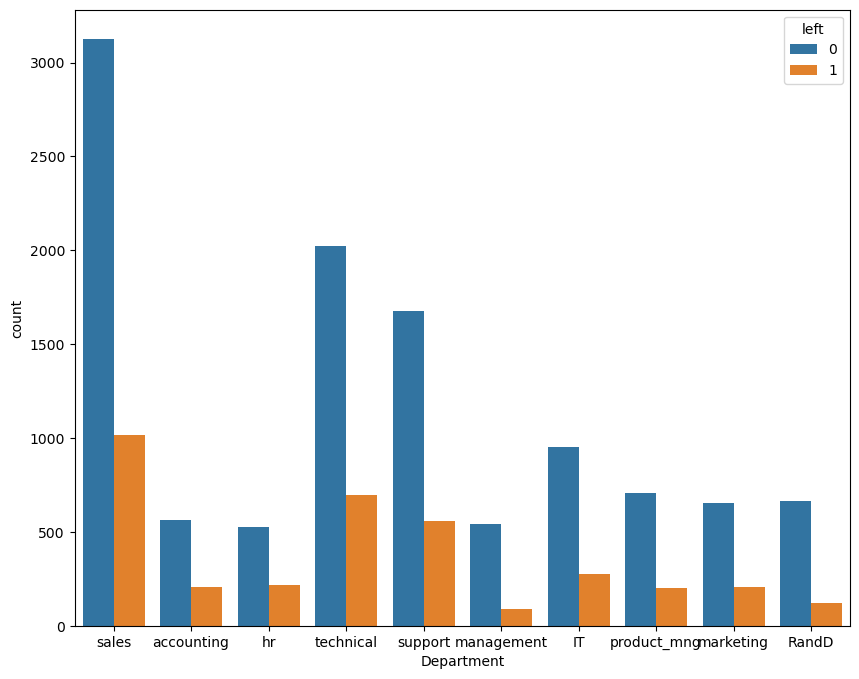

In [13]:
plt.figure(figsize=(10,8))
sns.countplot(x = 'Department',hue = 'left',data=df)
plt.show()

From above we can conclude that, from management and R&D departments very few employees left. Sales department have highest attrition rate as compared to others.

<AxesSubplot:>

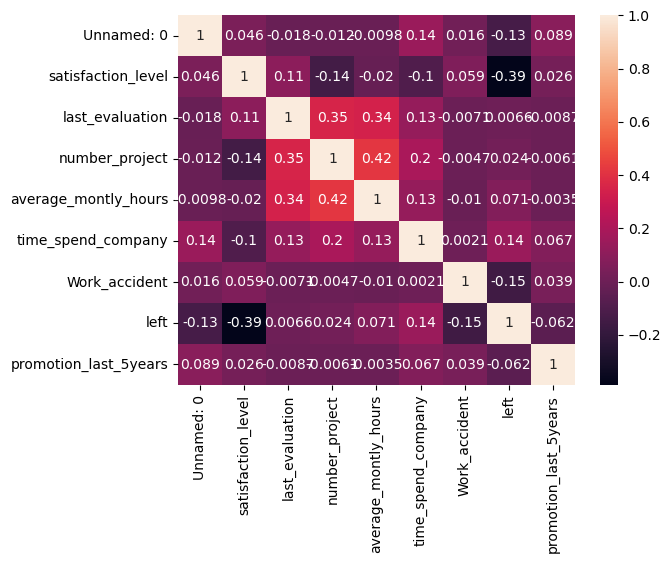

In [14]:
sns.heatmap(df.corr(),annot=True)

So from above analysis, we will use follwing columns for predictions
- satisfaction_level
- average_monthly_hours
- promotion_last_5 years
- salary

In [15]:
df_predict = df.loc[:,['satisfaction_level','average_montly_hours','promotion_last_5years','salary']]
df_predict

,satisfaction_level,average_montly_hours,promotion_last_5years,salary
0,0.38,157,0,low
1,0.80,262,0,medium
2,0.11,272,0,medium
3,0.72,223,0,low
4,0.37,159,0,low
...,...,...,...,...
14994,0.40,151,0,low
14995,0.37,160,0,low
14996,0.37,143,0,low
14997,0.11,280,0,low


In [16]:
# get dummies for salary/one hot encoding on salary
salary_dummies =  pd.get_dummies(df_predict['salary'])
salary_dummies

,high,low,medium
0,0,1,0
1,0,0,1
2,0,0,1
3,0,1,0
4,0,1,0
...,...,...,...
14994,0,1,0
14995,0,1,0
14996,0,1,0
14997,0,1,0


In [17]:
# concatenate revised df and salary dummies
df_merged = pd.concat([df_predict,salary_dummies],axis= 1)
df_merged

,satisfaction_level,average_montly_hours,promotion_last_5years,salary,high,low,medium
0,0.38,157,0,low,0,1,0
1,0.80,262,0,medium,0,0,1
2,0.11,272,0,medium,0,0,1
3,0.72,223,0,low,0,1,0
4,0.37,159,0,low,0,1,0
...,...,...,...,...,...,...,...
14994,0.40,151,0,low,0,1,0
14995,0.37,160,0,low,0,1,0
14996,0.37,143,0,low,0,1,0
14997,0.11,280,0,low,0,1,0


In [18]:
# drop salary column and one of dummy to avoid multicollinearity
X = df_merged.drop(columns=['salary','medium'])

In [19]:
# defining the Y/Targets
Y = df.left

In [20]:
#splitting the data for training and testing
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(X,Y,train_size = 0.8)

In [21]:
# creating the model
model = LogisticRegression()
model.fit(x_train,y_train)

LogisticRegression()

In [22]:
# predicting the targets
model.predict(x_test)

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [23]:
# checking the train accuaracy
model.score(x_train,y_train)

0.778481540128344

In [24]:
# checking the test accuracy
model.score(x_test,y_test)

0.7656666666666667

In [25]:
model.predict_proba(x_test)

array([[0.94999523, 0.05000477],
       [0.80389285, 0.19610715],
       [0.6534787 , 0.3465213 ],
       ...,
       [0.78856696, 0.21143304],
       [0.68382189, 0.31617811],
       [0.74433214, 0.25566786]])